<a href="https://colab.research.google.com/github/DurgaPhaniVikas/DurgaPhaniVikas_INFO5731_-Fall2023/blob/main/INFO5731_Assignment_Three_fall2023_Durga_Phani_Vikas_Telu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from nltk import ngrams, word_tokenize, pos_tag, download
from collections import Counter
import pandas as pd

# Download NLTK resources
download('punkt')
download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
def load_dataset(file_path):
    # Assuming your dataset is in a CSV file with a 'review' column
    data_url="/content/drive/MyDrive/kgf2_imdb_reviews.csv"
    df = pd.read_table(data_url,names=['Movie_review'])
    df
    return df['Movie_review'].tolist()

def extraction_of_ngrams(text, n):
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in n_grams]

def ngram_frequencies(df, n):
    ngram_frequencies = Counter()

    for Movie_review in df:
        ngrams_list = extraction_of_ngrams(Movie_review, n)
        ngram_frequencies.update(ngrams_list)

    return ngram_frequencies

def bigram_probs(df):
    bigram_counts = Counter()
    unigram_counts = Counter()

    for Movie_review in df:
        tokens = word_tokenize(Movie_review)
        bigrams = list(ngrams(tokens, 2))
        unigrams = list(ngrams(tokens, 1))

        bigram_counts.update(bigrams)
        unigram_counts.update(unigrams)

    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        unigram = bigram[0]

        # Check if the count of the unigram is zero to avoid division by zero
        if unigram_counts[unigram] != 0:
            probability = count / unigram_counts[unigram]
        else:
            probability = 0

        bigram_probabilities[bigram] = probability

    return bigram_probabilities

def relative_probs(df):
    noun_phrase_frequencies = Counter()

    for review in df:
        tokens = word_tokenize(review)
        tagged_tokens = pos_tag(tokens)

        # Extracting noun phrases
        noun_phrases = [word for word, pos in tagged_tokens if pos.startswith('NN')]

        noun_phrase_frequencies.update(noun_phrases)

    max_frequencies = noun_phrase_frequencies.most_common(1)[0][1]

    relative_probabilities = {}
    for Movie_review in df:
        tokens = word_tokenize(Movie_review)
        tagged_tokens = pos_tag(tokens)

        # Extracting noun phrases
        noun_phrases = [word for word, pos in tagged_tokens if pos.startswith('NN')]

        # Calculating relative probabilities
        relative_probabilities[Movie_review] = {noun: freq / max_frequencies for noun, freq in noun_phrase_frequencies.items()}

    return relative_probabilities

In [7]:
def display_results(ngram_frequencies, bigram_probabilities, relative_probabilities):
    print("N-gram Frequencies:")
    print(ngram_frequencies)

    print("\nBigram Probabilities:")
    print(bigram_probabilities)

    print("\nRelative Probabilities of Noun Phrases:")
    df = pd.DataFrame.from_dict(relative_probabilities, orient='index')
    print(df)

if __name__ == "__main__":
    # Change the file_path to the path of your dataset
    file_path = "/content/drive/MyDrive/kgf2_imdb_reviews.csv"
    Movie_reviews = load_dataset(file_path)

    n = 3
    ngram_frequencies = ngram_frequencies(Movie_reviews, n)
    bigram_probabilities = bigram_probs(Movie_reviews)
    relative_probabilities = relative_probs(Movie_reviews)

    display_results(ngram_frequencies, bigram_probabilities, relative_probabilities)

N-gram Frequencies:
Counter({'this movie .': 2000, 'the first part': 2000, 'of this movie': 1600, '. There is': 1600, ', and it': 1600, 'the film is': 1200, 'the movie .': 1200, 'Chapter 1 ,': 1200, '. The film': 1200, 'in the film': 1200, '. Raveena Tandon': 1200, 'KGF 2 is': 1200, ". It 's": 1200, "story does n't": 1200, 'the second part': 1200, 'there is a': 1200, 'the first film': 1200, 'from Yash ,': 800, "but it 's": 800, "it 's not": 800, '. There are': 800, "n't take away": 800, ', because the': 800, 'the success of': 800, 'KGF Chapter 1': 800, '. I can': 800, 'I can safely': 800, 'to building up': 800, 'KGF Chapter 2': 800, 'scene where it': 800, ', but it': 800, "I 'd definitely": 800, "it 's an": 800, 'the end ,': 800, 'this movie is': 800, '. Prashanth Neel': 800, 'Chapter 2 is': 800, 'I really loved': 800, ". That 's": 800, 'Sanjay Dutt .': 800, '. All the': 800, "I 'm not": 800, 'worth mentioning .': 800, 'of the movie': 800, ': Chapter 2': 800, '. But the': 800, 'The fil

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [17]:
# Write your code here
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load your documents from assignment two
# Replace 'your_dataset.csv' with the actual path to your dataset
file_path = "/content/drive/MyDrive/kgf2_imdb_reviews.csv"
df = pd.read_csv(file_path, names=['Movie_review'], delimiter='\t')
docs = df['Movie_review'].tolist()

# Design a query
query = "Kgf 2 is awesome"

# Combine documents and query
complete_texts = docs + [query]

# TF-IDF Vectorizer
vect = TfidfVectorizer()
tfidf_matrix = vect.fit_transform(complete_texts)

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1]).flatten()

# Rank the documents based on cosine similarity
ranking_of_doc = sorted(enumerate(cosine_sim), key=lambda x: x[1], reverse=True)

# Display results
print("Query: ", query)
print("\nRanking of Documents:")
for rank, (doc_index, similarity) in enumerate(ranking_of_doc, start=1):
    print(f"Rank {rank}: Document {doc_index + 1} - Similarity: {similarity:.4f}")







Streaming output truncated to the last 5000 lines.
Rank 5002: Document 5029 - Similarity: 0.0380
Rank 5003: Document 5054 - Similarity: 0.0380
Rank 5004: Document 5079 - Similarity: 0.0380
Rank 5005: Document 5104 - Similarity: 0.0380
Rank 5006: Document 5129 - Similarity: 0.0380
Rank 5007: Document 5154 - Similarity: 0.0380
Rank 5008: Document 5179 - Similarity: 0.0380
Rank 5009: Document 5204 - Similarity: 0.0380
Rank 5010: Document 5229 - Similarity: 0.0380
Rank 5011: Document 5254 - Similarity: 0.0380
Rank 5012: Document 5279 - Similarity: 0.0380
Rank 5013: Document 5304 - Similarity: 0.0380
Rank 5014: Document 5329 - Similarity: 0.0380
Rank 5015: Document 5354 - Similarity: 0.0380
Rank 5016: Document 5379 - Similarity: 0.0380
Rank 5017: Document 5404 - Similarity: 0.0380
Rank 5018: Document 5429 - Similarity: 0.0380
Rank 5019: Document 5454 - Similarity: 0.0380
Rank 5020: Document 5479 - Similarity: 0.0380
Rank 5021: Document 5504 - Similarity: 0.0380
Rank 5022: Document 5529 - Si

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


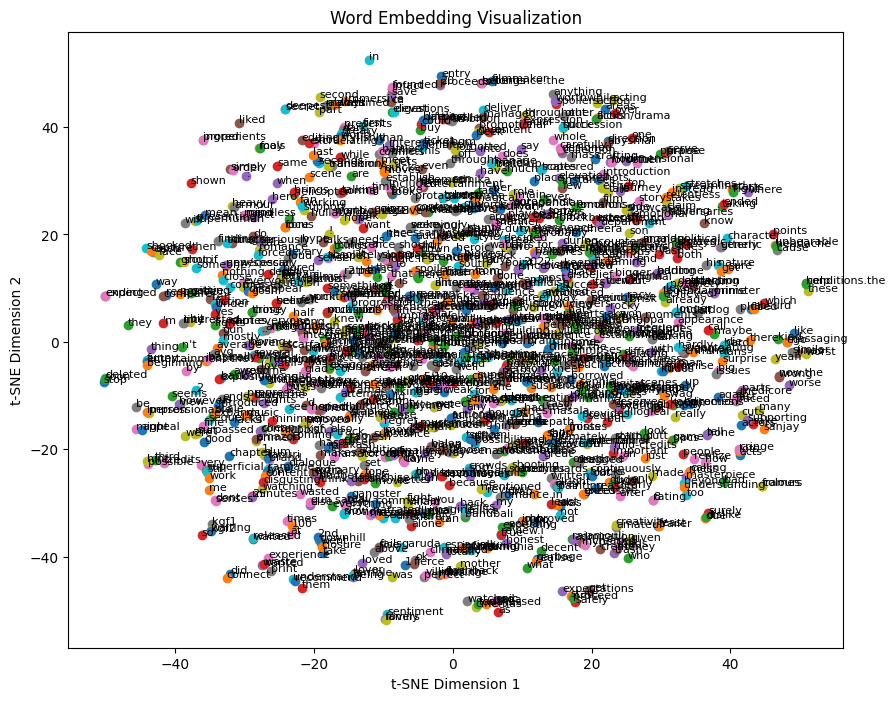

In [22]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
import numpy as np

nltk.download('punkt')

# Load your dataset
file_path = "/content/drive/MyDrive/kgf2_imdb_reviews.csv"
df = pd.read_csv(file_path, names=['Movie_review'], delimiter='\t')

# Extract movie reviews
reviews = df['Movie_review'].tolist()

# Tokenize the movie reviews
tokenized_reviews = [word_tokenize(review.lower()) for review in reviews]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4)

# Visualize the word embeddings using t-SNE
words = list(model.wv.index_to_key)
vectors = np.array([model.wv[word] for word in words])

# Reduce dimensionality with t-SNE
tsne_model = TSNE(n_components=2, random_state=42)
vectors_2d = tsne_model.fit_transform(vectors)

# Create a DataFrame for visualization
df_tsne = pd.DataFrame({'word': words, 'x': vectors_2d[:, 0], 'y': vectors_2d[:, 1]})

# Plot the word embeddings
plt.figure(figsize=(10, 8))
for i, row in df_tsne.iterrows():
    plt.scatter(row['x'], row['y'])
    plt.text(row['x'], row['y'], row['word'], fontsize=8)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word Embedding Visualization')
plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [35]:
# The GitHub link of your final csv file

# Link: https://github.com/DurgaPhaniVikas/DurgaPhaniVikas_INFO5731_-Fall2023/blob/main/kgf2_imdb_reviews_sent.csv



